# problem statement --- predict the promtion of employee in the industry for the organisation 


In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
df_train = pd.read_csv(r"C:\Users\Yash\Downloads\train_hr.csv")
df_test  =pd.read_csv(r"C:\Users\Yash\Downloads\test_hr.csv")
#df

In [57]:
print(df_train.isnull().sum())
df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [58]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [59]:
print(df_train.shape)
print(df_test.shape)


(54808, 14)
(23490, 13)


In [60]:
print(df_train.previous_year_rating.value_counts())
print(df_test.previous_year_rating.value_counts())

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64
3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64


In [61]:
df_train.previous_year_rating = df_train.previous_year_rating.fillna(df_train.previous_year_rating.mean())
df_test.previous_year_rating = df_test.previous_year_rating.fillna(df_test.previous_year_rating.mean())

In [62]:
print(df_train.education.value_counts())
print(df_test.education.value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64


In [63]:
df_train.education = df_train.education.fillna("Master\'s & above")
df_test.education = df_test.education.fillna("Master\'s & above")

In [64]:
print(df_train.dtypes)
print(df_test.dtypes)

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object
employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object


In [65]:
print(df_train.department.value_counts())
print(df_test.department.value_counts())

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: department, dtype: int64


In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
df_train.department  = le.fit_transform(df_train.department)
df_test.department  = le.fit_transform(df_test.department)

In [68]:
df_train.region = le.fit_transform(df_train.region)
df_test.region = le.fit_transform(df_test.region)

In [69]:
df_train.education = le.fit_transform(df_train.education)
df_test.education = le.fit_transform(df_test.education)

In [70]:
df_train.gender = le.fit_transform(df_train.gender)
df_test.gender = le.fit_transform(df_test.gender)

In [71]:
df_train.recruitment_channel = le.fit_transform(df_train.recruitment_channel)
df_test.recruitment_channel = le.fit_transform(df_test.recruitment_channel)

In [141]:
data1 = df_train.corr()
data2 = df_test.corr()

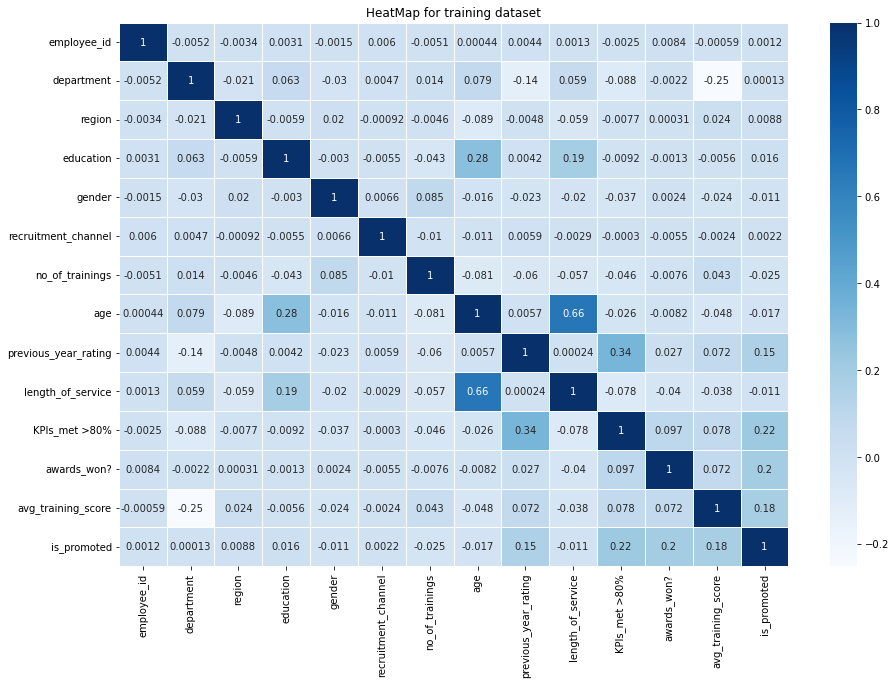

In [143]:
plt.figure(figsize=(15,10))
heat_map = sns.heatmap( data1,linewidth = 1, annot=True,cmap = plt.cm.Blues)
plt.title( "HeatMap for training dataset" )
plt.show()

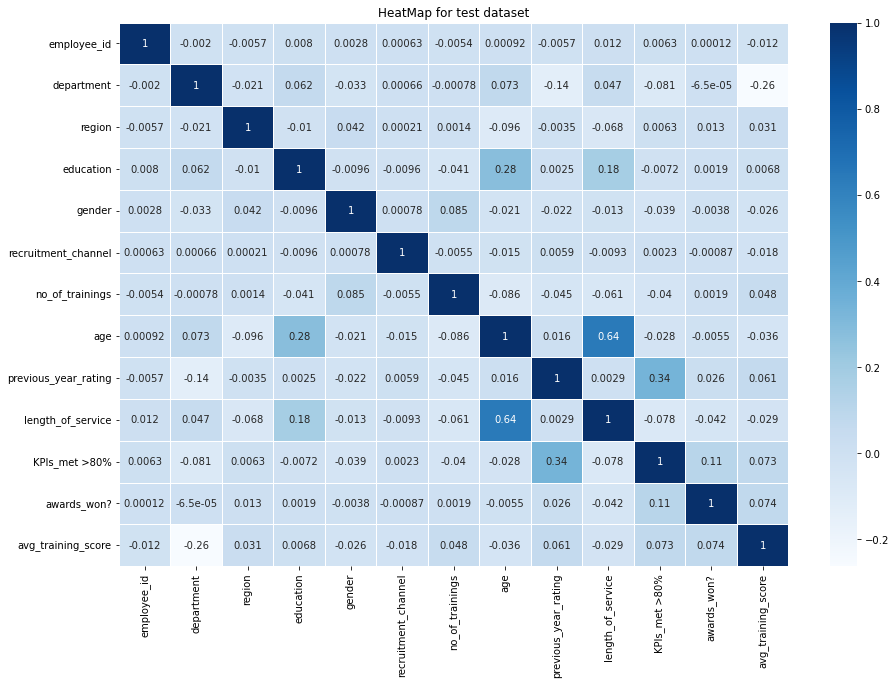

In [144]:
plt.figure(figsize=(15,10))
heat_map = sns.heatmap( data2,linewidth = 1, annot=True,cmap = plt.cm.Blues)
plt.title( "HeatMap for test dataset" )
plt.show()

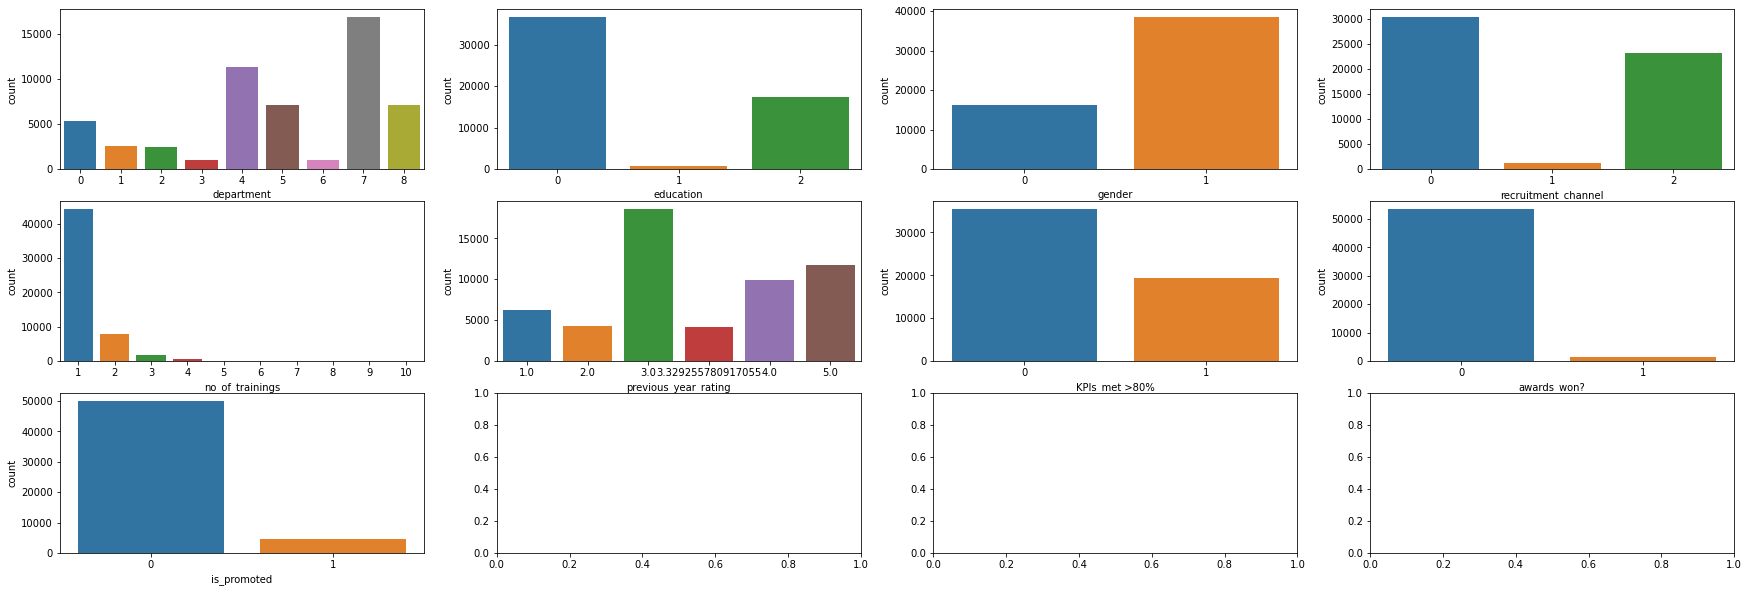

In [145]:
fig,ax = plt.subplots(3,4,figsize = (30,10))
sns.countplot("department",data=df_train,ax=ax[0][0])
sns.countplot("education",data=df_train,ax=ax[0][1])
sns.countplot("gender",data=df_train,ax=ax[0][2])
sns.countplot("recruitment_channel",data=df_train,ax=ax[0][3])
sns.countplot("no_of_trainings",data=df_train,ax=ax[1][0])
sns.countplot("previous_year_rating",data=df_train,ax=ax[1][1])
sns.countplot("KPIs_met >80%",data=df_train,ax=ax[1][2])
sns.countplot("awards_won?",data=df_train,ax=ax[1][3])
sns.countplot("is_promoted",data=df_train,ax=ax[2][0])
plt.show()

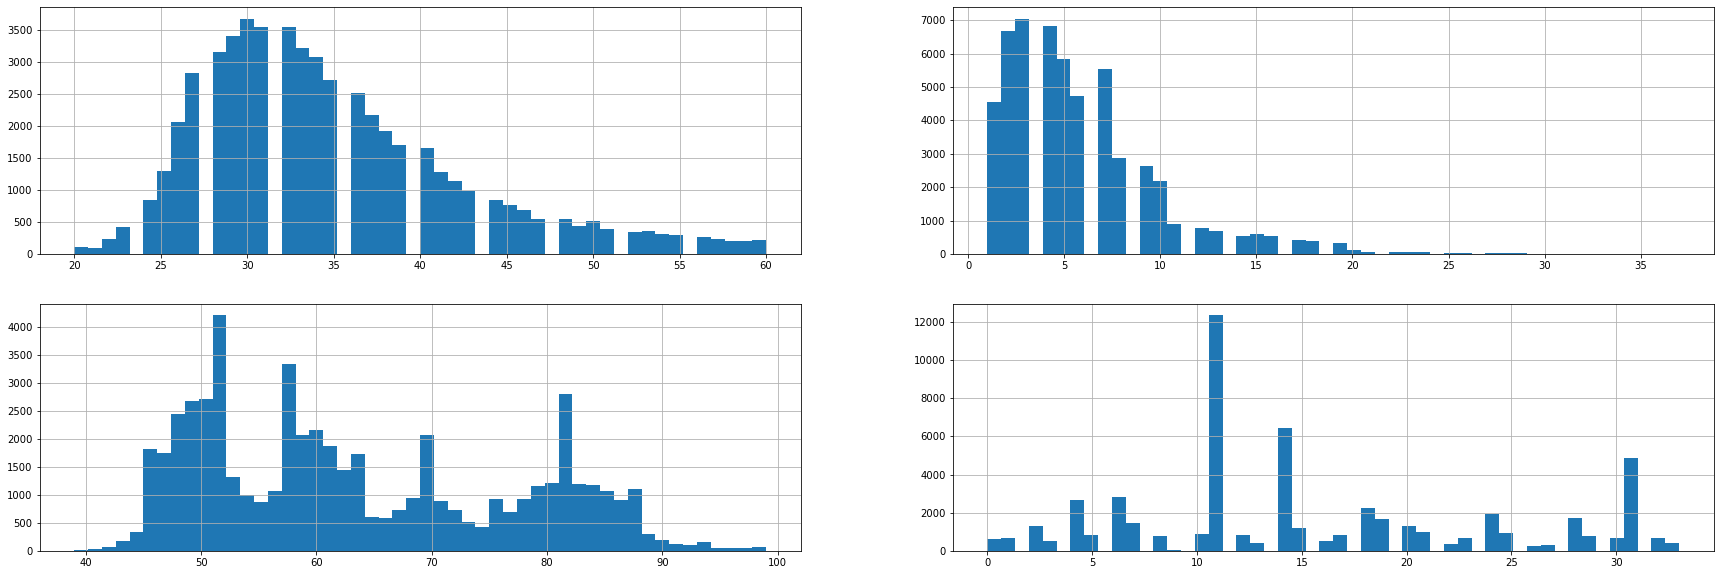

In [146]:
fig,ax = plt.subplots(2,2,figsize = (30,10))
(df_train["age"].hist(bins = 50,ax=ax[0][0]))
(df_train['length_of_service'].hist(bins = 50,ax=ax[0][1]))
(df_train['avg_training_score'].hist(bins = 50,ax=ax[1][0]))
df_train["region"].hist(bins = 50,ax=ax[1][1])
plt.show()

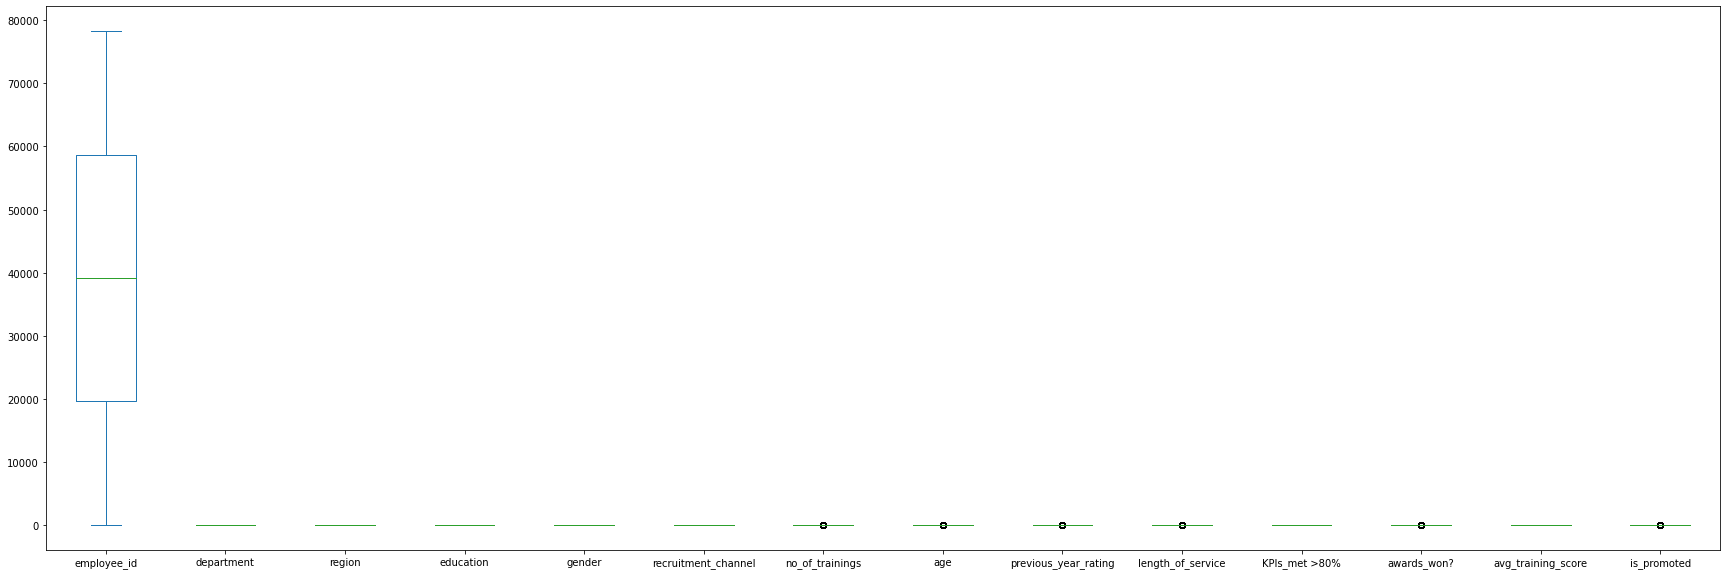

In [147]:
df_train.plot.box(figsize =(30,10))
plt.show()

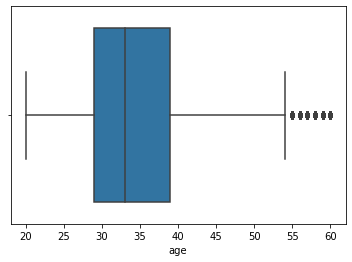

In [148]:
sns.boxplot(x=df_train["age"])
plt.show()

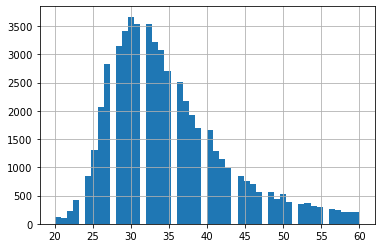

In [149]:
df_train.age.hist(bins = 50)
plt.show()

In [150]:
df_train.age.describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [151]:
upper = df_train['age'].mean() + 3*df_train['age'].std()
lower = df_train['age'].mean() - 3*df_train['age'].std()
print(upper,lower)

57.784423091547914 11.82340788203259


In [152]:
df1 = df_train.copy()

In [153]:
df1.loc[df1['age']>57, 'age'] =58 

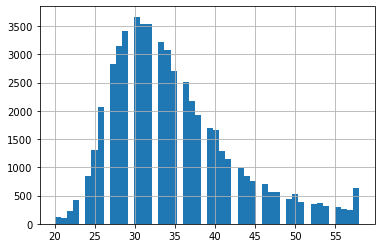

In [154]:
df1.age.hist(bins = 50)
plt.show()

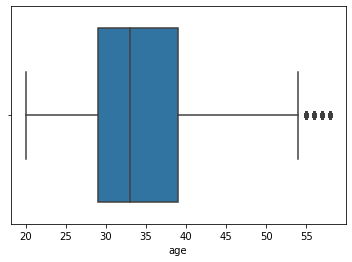

In [155]:
sns.boxplot(x=df1["age"])
plt.show()

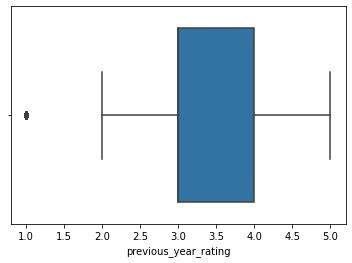

In [156]:
sns.boxplot(x=df1["previous_year_rating"])
plt.show()

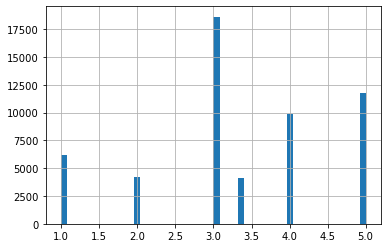

In [157]:
df1.previous_year_rating.hist(bins = 50)
plt.show()

In [158]:
df1.length_of_service.describe()

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

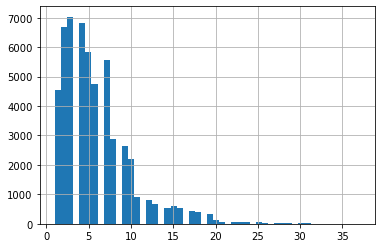

In [159]:
df1.length_of_service.hist(bins = 50)
plt.show()

In [160]:
IQR = df1.length_of_service.quantile(.75)-df1.length_of_service.quantile(.25)
print(IQR)

4.0


In [161]:
lower = df1['length_of_service'].quantile(.25)-(3*IQR)
upper = df1['length_of_service'].quantile(.75)+(3*IQR)
print(lower,upper)

-9.0 19.0


In [162]:
df1.loc[df1['length_of_service']> 19.0, 'length_of_service'] = 19.0

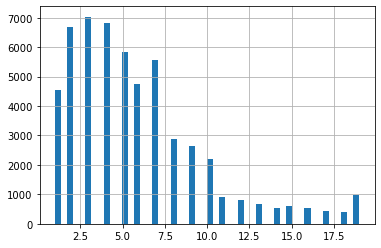

In [163]:
df1.length_of_service.hist(bins = 50)
plt.show()

In [164]:
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


# model building


In [165]:
from sklearn.linear_model import LogisticRegression 
lm = LogisticRegression()

In [166]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [167]:
x  = df1.iloc[:,1:-1]
y  = df1.iloc[:,-1]
test_x = df_test.iloc[:,1:]

In [168]:
x.shape , y.shape,test_x.shape

((54808, 12), (54808,), (23490, 12))

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3,random_state = 50)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((38365, 12), (16443, 12), (38365,), (16443,))

In [171]:
lm.fit(x_train,y_train)

LogisticRegression()

In [172]:
pre_test = lm.predict(x_test)
pre_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [173]:
cf = confusion_matrix(pre_test,y_test)
cf

array([[14898,  1277],
       [  135,   133]], dtype=int64)

In [174]:
acc =cf.diagonal().sum()/cf.sum()*100
acc

91.41275922885119

In [175]:
print(classification_report(pre_test,y_test))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     16175
           1       0.09      0.50      0.16       268

    accuracy                           0.91     16443
   macro avg       0.54      0.71      0.56     16443
weighted avg       0.98      0.91      0.94     16443



In [176]:
test_x.shape

(23490, 12)

In [177]:
test_x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,1,2,1,24,3.339146,1,1,0,77
1,2,28,0,0,0,1,31,3.000000,5,0,0,51
2,7,4,0,1,0,1,31,1.000000,4,0,0,47
3,5,11,0,0,0,3,31,2.000000,9,0,0,65
4,1,21,0,1,2,1,30,4.000000,7,0,0,61


In [178]:
result = lm.predict(test_x)

In [179]:
result

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [180]:
result.shape

(23490,)

In [181]:
prob = lm.predict_proba(test_x)
prob

array([[0.74698836, 0.25301164],
       [0.97631513, 0.02368487],
       [0.97627008, 0.02372992],
       ...,
       [0.95479101, 0.04520899],
       [0.97898212, 0.02101788],
       [0.86703281, 0.13296719]])

In [182]:
pdf = pd.DataFrame(result,columns =["is_promoted"] )
pdf

,is_promoted
0,0
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


In [183]:
pdf1 = pd.concat([df_test.iloc[:,0],pdf],axis = 1)
pdf1["is_promoted"].value_counts()

0    23150
1      340
Name: is_promoted, dtype: int64

In [184]:
pdf1.to_csv(r"C:\Users\Yash\Downloads\result_hr.csv",index = False)